In [1]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_sum_of_gaussian_pullback_manifold.quadratic_double_banana_pullback_manifold import QuadraticDoubleBananaPullbackManifold
# from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


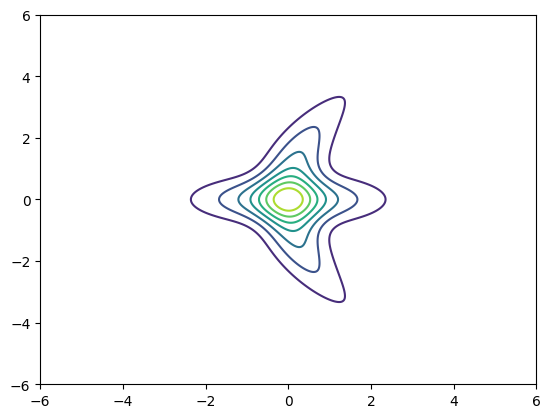

In [2]:
double_banana_manifold = QuadraticDoubleBananaPullbackManifold()

xx = torch.linspace(-6.0, 6.0, 500)
yy = torch.linspace(-6.0, 6.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(double_banana_manifold.dsg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [3]:
# special points
x0 = torch.tensor([2.,4.])
x1 = torch.tensor([2.,-4.])
x2 = torch.tensor([2.,0.])

L = 100
tol = 1e-3
max_iter = 20000
step_size = 1/8

In [4]:
# # test barycentre # TODO this might be very hard to compute...
# x=torch.zeros((3,2))
# x[0] = x0
# x[1] = x1
# x[2] = x2

# barycentre = double_banana_manifold.barycentre(x).detach().numpy()

# plt.contour(x_grid, y_grid, density_banana)
# plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
# plt.scatter(barycentre[0], barycentre[1], color="orange")
# plt.savefig("results/quadratic_double_banana/barycentre.eps")
# plt.show()

In [5]:
# test inner
X = torch.eye(2)

inner_0 = double_banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = double_banana_manifold.inner(x0[None], X[None], X[None])
inner_x2 = double_banana_manifold.inner(x2[None], X[None], X[None])

print(inner_0)
print(inner_x0)
print(inner_x2)

tensor([[[5.0625, 0.0000],
         [0.0000, 4.5156]]])
tensor([[[ 16.0000, -14.2222],
         [-14.2222,  12.7045]]])
tensor([[[ 0.2532,  0.0000],
         [ 0.0000, 15.9727]]])


Epoch 0, Loss 0.2626418471336365 | Validation: 1.0
Epoch 1000, Loss 0.15767528116703033 | Validation: 0.2237824237196429
Epoch 2000, Loss 0.1389940083026886 | Validation: 0.08438993860115675
Epoch 3000, Loss 0.13221949338912964 | Validation: 0.03352743206777854
Epoch 4000, Loss 0.12959939241409302 | Validation: 0.013839874329172165
Epoch 5000, Loss 0.12855257093906403 | Validation: 0.006090657166759264
Epoch 6000, Loss 0.1281151920557022 | Validation: 0.002989849216134751
Epoch 7000, Loss 0.1279190331697464 | Validation: 0.0017219444540862601
Epoch 8000, Loss 0.12782156467437744 | Validation: 0.0011920877511115097


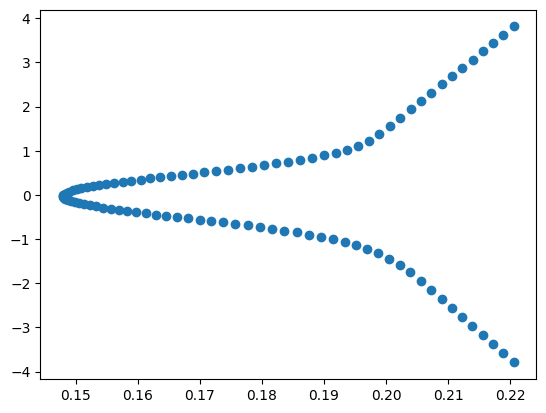

Epoch 0, Loss 0.5496264696121216 | Validation: 1.0
Epoch 1000, Loss 0.3093346357345581 | Validation: 0.5798575651778716
Epoch 2000, Loss 0.2372165024280548 | Validation: 0.4130574923327261
Epoch 3000, Loss 0.19255430996418 | Validation: 0.2947864686381772
Epoch 4000, Loss 0.16081503033638 | Validation: 0.20924324852818962
Epoch 5000, Loss 0.13737015426158905 | Validation: 0.1487361152371523
Epoch 6000, Loss 0.1198636069893837 | Validation: 0.10695034550409539
Epoch 7000, Loss 0.10681473463773727 | Validation: 0.0787215086036241
Epoch 8000, Loss 0.09716245532035828 | Validation: 0.05985711392475784
Epoch 9000, Loss 0.09009329229593277 | Validation: 0.04708745661389333
Epoch 10000, Loss 0.08496865630149841 | Validation: 0.038047218266296284
Epoch 11000, Loss 0.08128752559423447 | Validation: 0.03119508746520919
Epoch 12000, Loss 0.07866239547729492 | Validation: 0.025654276724525554
Epoch 13000, Loss 0.07679927349090576 | Validation: 0.020994349666368158
Epoch 14000, Loss 0.0754797980189

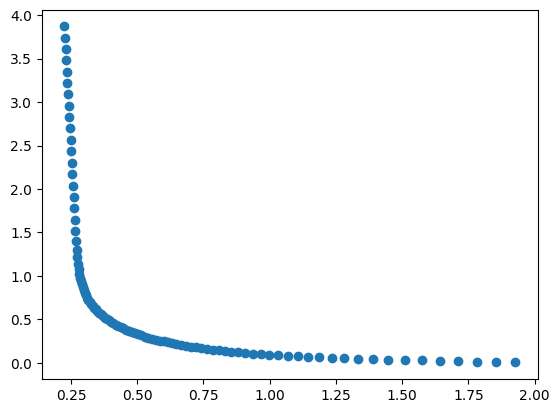

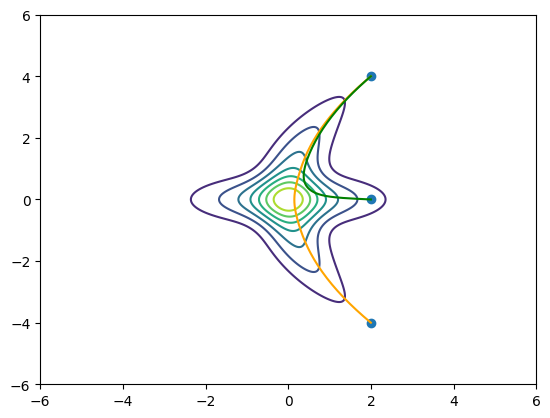

In [6]:
# test interpolation
t = torch.linspace(0.,1.,200)

geodesic_x0_x1 = double_banana_manifold.geodesic(x0,x1,t, L=L, tol=tol, max_iter=max_iter, step_size=step_size).detach().numpy()
geodesic_x0_x2 = double_banana_manifold.geodesic(x0,x2,t, L=L, tol=tol, max_iter=max_iter, step_size=step_size).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic_x0_x1[:,0], geodesic_x0_x1[:,1], color="orange")
plt.plot(geodesic_x0_x2[:,0], geodesic_x0_x2[:,1], color="green")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/geodesic.eps")
plt.show()

# TODO make second plot with decision boundaries so that we can clearly see that we really only have weird geodesics on the boundary region

Epoch 0, Loss 0.2626418471336365 | Validation: 1.0
Epoch 1000, Loss 0.15767528116703033 | Validation: 0.2237824237196429
Epoch 2000, Loss 0.1389940083026886 | Validation: 0.08438993860115675
Epoch 3000, Loss 0.13221949338912964 | Validation: 0.03352743206777854
Epoch 4000, Loss 0.12959939241409302 | Validation: 0.013839874329172165
Epoch 5000, Loss 0.12855257093906403 | Validation: 0.006090657166759264
Epoch 6000, Loss 0.1281151920557022 | Validation: 0.002989849216134751
Epoch 7000, Loss 0.1279190331697464 | Validation: 0.0017219444540862601
Epoch 8000, Loss 0.12782156467437744 | Validation: 0.0011920877511115097


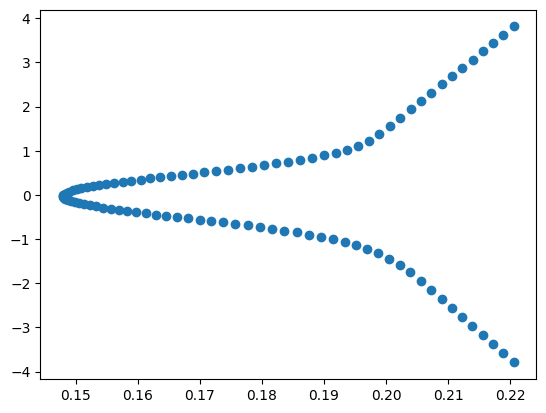

Epoch 0, Loss 0.5496264696121216 | Validation: 1.0
Epoch 1000, Loss 0.3093346357345581 | Validation: 0.5798575651778716
Epoch 2000, Loss 0.2372165024280548 | Validation: 0.4130574923327261
Epoch 3000, Loss 0.19255430996418 | Validation: 0.2947864686381772
Epoch 4000, Loss 0.16081503033638 | Validation: 0.20924324852818962
Epoch 5000, Loss 0.13737015426158905 | Validation: 0.1487361152371523
Epoch 6000, Loss 0.1198636069893837 | Validation: 0.10695034550409539
Epoch 7000, Loss 0.10681473463773727 | Validation: 0.0787215086036241
Epoch 8000, Loss 0.09716245532035828 | Validation: 0.05985711392475784
Epoch 9000, Loss 0.09009329229593277 | Validation: 0.04708745661389333
Epoch 10000, Loss 0.08496865630149841 | Validation: 0.038047218266296284
Epoch 11000, Loss 0.08128752559423447 | Validation: 0.03119508746520919
Epoch 12000, Loss 0.07866239547729492 | Validation: 0.025654276724525554
Epoch 13000, Loss 0.07679927349090576 | Validation: 0.020994349666368158
Epoch 14000, Loss 0.0754797980189

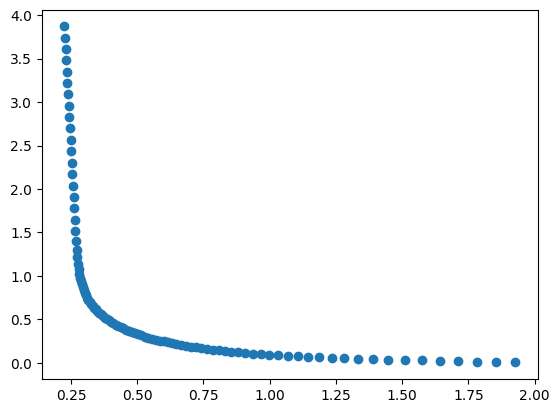

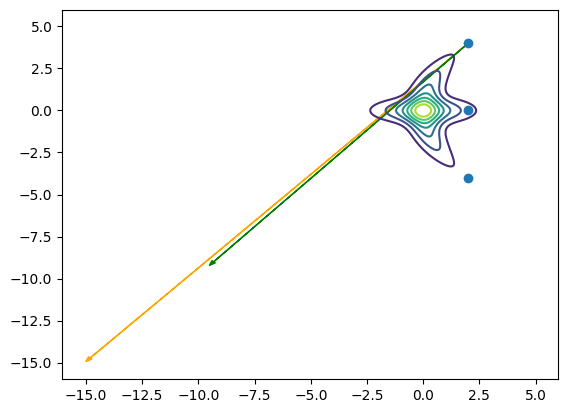

In [7]:
# test logarithmic mapping

logarithmic_x0_x1 = double_banana_manifold.log(x0,x1[None], L=L, tol=tol, max_iter=max_iter, step_size=step_size)[0].detach().numpy()
logarithmic_x0_x2 = double_banana_manifold.log(x0,x2[None], L=L, tol=tol, max_iter=max_iter, step_size=step_size)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2, color="orange")
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2, color="green")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/logarithmic.eps")
plt.show()

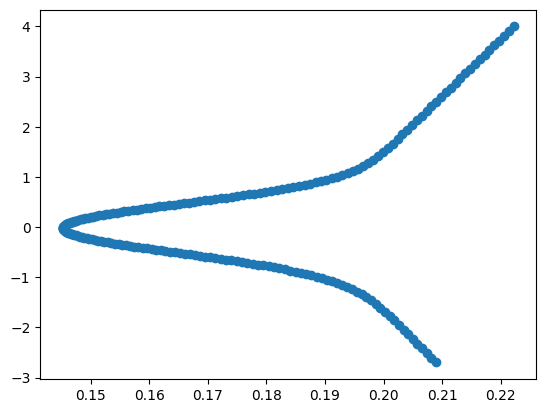

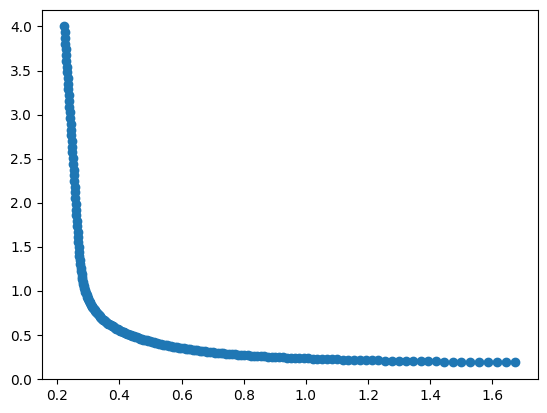

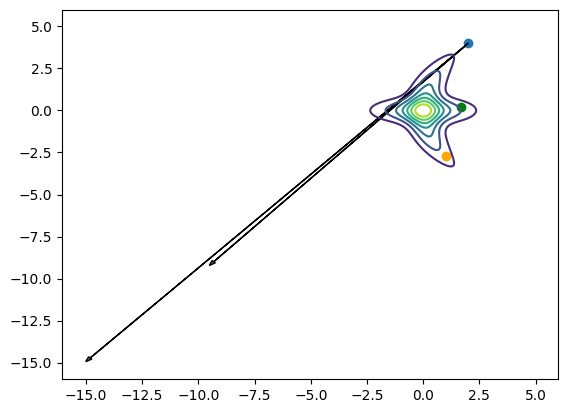

The error between exp_x0(log_x0 (x1)) and x1 is 1.629673719406128
The error between exp_x0(log_x0 (x2)) and x2 is 0.371582955121994


In [8]:
# test exponential mapping
exponential_to_x1 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x1)[None], L=2*L, tol=1e-4)[0].detach().numpy()
exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None], L=2*L, tol=1e-4)[0].detach().numpy()
# exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None])[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2)
plt.scatter(exponential_to_x1[0], exponential_to_x1[1], color="orange")
plt.scatter(exponential_to_x2[0], exponential_to_x2[1], color="green")
plt.savefig("results/quadratic_double_banana/exponential.eps")
plt.show()
print(f"The error between exp_x0(log_x0 (x1)) and x1 is {torch.norm(torch.tensor(exponential_to_x1) - x1)}")
print(f"The error between exp_x0(log_x0 (x2)) and x2 is {torch.norm(torch.tensor(exponential_to_x2) - x2)}")

In [3]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

NameError: name 'x0' is not defined

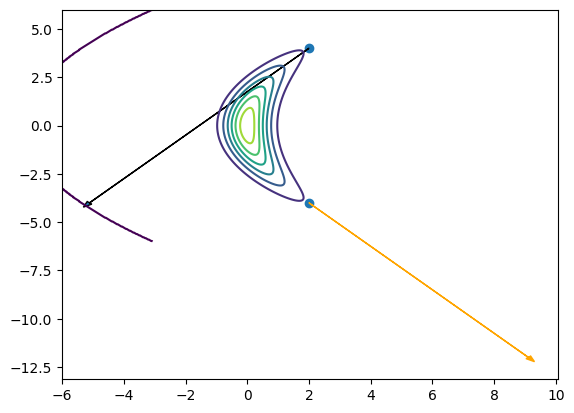

In [ ]:
# test parallel transport
parallel_transport = banana_manifold.parallel_transport(x0, logarithmic[None], x1)[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.arrow(x1[0], x1[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/quadratic_double_banana/parallel-transport.eps")
plt.show()


tensor([4.0000, 0.2500])
constructed a Riemannian autoencoder with d_eps = 1 and eps = 0.05882352963089943


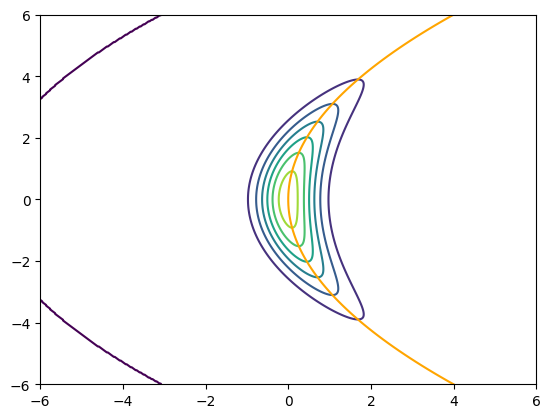

In [ ]:
# Riemannian autoencoder
# TODO multi auto-encoder
epsilon = 0.1
banana_rae = DeformedGaussianRiemannianAutoencoder(banana_manifold, epsilon)

p = torch.linspace(-6, 6, 100)[:,None]
rae_decode_p = banana_rae.decode(p)

plt.contour(x_grid, y_grid, density_banana)
plt.plot(rae_decode_p[:,0], rae_decode_p[:,1], color="orange")
plt.savefig("results/quadratic_double_banana/rae_manifold.eps")
plt.show()

curvature tensor shape torch.Size([250000, 2, 2, 2, 2])
ricci tensor shape torch.Size([250000, 2, 2])
 minimal curvature = -0.13135147094726562 and maximal curvature = 602.7389526367188
curvature tensor shape torch.Size([250000, 2, 2, 2, 2])
ricci tensor shape torch.Size([250000, 2, 2])


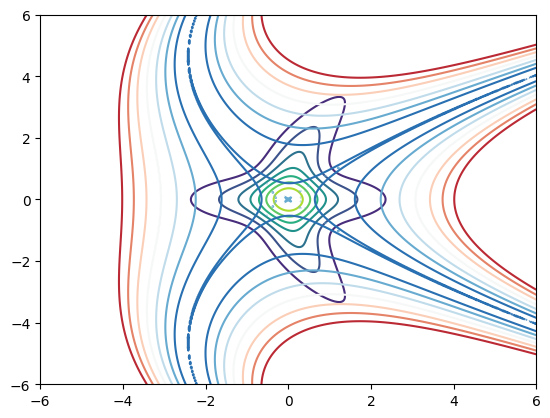

In [7]:
ricci_scalar = double_banana_manifold.ricci_scalar(xy_grid.reshape(-1,2)).reshape(x_grid.shape)

print(f" minimal curvature = {ricci_scalar.min()} and maximal curvature = {ricci_scalar.max()}") # TODO debug sign error

log_squared_ricci_scalar = torch.log(double_banana_manifold.ricci_scalar(xy_grid.reshape(-1,2)).reshape(x_grid.shape) **2)

plt.contour(x_grid, y_grid, density_banana)
plt.contour(x_grid, y_grid, log_squared_ricci_scalar, cmap='RdBu')
plt.savefig("results/quadratic_double_banana/ricci-scalar.eps")
plt.show()